In [1]:
#on results folder, open and load aug_setA_optimal_results.csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

optimal_df = pd.read_csv(os.path.join('CVRP_Heuristic/results', 'aug_setA_optimal_results.csv'))
optimal_df.head()

,algo,cost,time_to_best,instance_name
0,optimal,784,NaN,A-n32-k5
1,optimal,661,NaN,A-n33-k5
2,optimal,742,NaN,A-n33-k6
3,optimal,778,NaN,A-n34-k5
4,optimal,799,NaN,A-n36-k5


In [2]:
#read the CVRP_our_results.csv file
our_df = pd.read_csv(os.path.join('CVRP_Heuristic/results', 'CVRP_our_results.csv'))
our_df.head()

,algo,cost,time_to_best,instance_name
0,cw,707.808874,0.000525,A-n37-k5
1,ls,694.775840,0.002646,A-n37-k5
2,tabu,694.775840,0.005813,A-n37-k5
3,alns,672.465220,0.986884,A-n37-k5
4,lns,672.465220,0.069576,A-n37-k5


In [3]:
#red the CVRP_pyvrp_results.csv file
pyvrp_df = pd.read_csv(os.path.join('CVRP_Heuristic/results', 'CVRP_pyvrp_summary.csv'))
pyvrp_df.head()

,algo,cost,time_to_best,instance_name
0,pyvrp,1763.0,90.009,A-n80-k10
1,pyvrp,1034.0,90.005,A-n61-k9
2,pyvrp,1616.0,90.005,A-n63-k9
3,pyvrp,1073.0,90.004,A-n55-k9
4,pyvrp,661.0,90.003,A-n33-k5


In [4]:
#add the rows of all three dataframes based on instance name, all dfs have the sames columns, just add the rows
combined_df = pd.concat([optimal_df, our_df, pyvrp_df], ignore_index=True)
combined_df.head()

,algo,cost,time_to_best,instance_name
0,optimal,784.0,NaN,A-n32-k5
1,optimal,661.0,NaN,A-n33-k5
2,optimal,742.0,NaN,A-n33-k6
3,optimal,778.0,NaN,A-n34-k5
4,optimal,799.0,NaN,A-n36-k5


In [5]:
# Go to the ../CVRP_Optimal/Results and load all CSV files
optimal_results_path = os.path.join('./', 'CVRP_Optimal', 'Results')
optimal_files = os.listdir(optimal_results_path)
print(f"Found {len(optimal_files)} files in {optimal_results_path}")
print(optimal_files)

# Filter only CSV files
csv_files = [f for f in optimal_files if f.endswith('.csv')]
print(f"\nFound {len(csv_files)} CSV files: {csv_files}")

# Process each CSV and collect into two lists
dfs_list = []
dfs_list_with_na = []

for csv_file in csv_files:
    print(f"\nProcessing {csv_file}...")
    
    # Load the CSV
    df = pd.read_csv(os.path.join(optimal_results_path, csv_file))
    
    # Rename 'name' to 'instance_name' and remove everything from '.' onwards
    df['instance_name'] = df['name'].apply(lambda x: x.split('.')[0])
    
    # Extract algo name from filename (e.g., 'batch_results_2n_0.0.csv' -> 'optimal_2n_0.0')
    algo_name = csv_file.replace('batch_results_', '').replace('.csv', '')
    df['algo'] = f'optimal_{algo_name}'
    
    # Rename columns
    df = df.rename(columns={'runtime': 'time_to_best', 'objective': 'cost'})
    
    # Keep only the 4 columns we need
    df = df[['instance_name', 'algo', 'time_to_best', 'cost']]

    # Check how many NA costs are there
    num_na_costs = df['cost'].isna().sum()
    print(f"  Number of NaN costs: {num_na_costs}")
    
    # Always add to the "with NA" list
    dfs_list_with_na.append(df.copy())
    
    # Only keep in main list if 0 NaN values
    if num_na_costs == 0:
        print(f"  ✓ Loaded {len(df)} rows with algo name: optimal_{algo_name}")
        dfs_list.append(df)
    else:
        print(f"  ✗ Skipped from main results (has NaN values)")

# Concatenate dataframes without NaN
if dfs_list:
    cvrp_optimal_results = pd.concat(dfs_list, ignore_index=True)
    print(f"\nTotal rows in cvrp_optimal_results (no NaN): {len(cvrp_optimal_results)}")
    print(f"Unique algorithms: {cvrp_optimal_results['algo'].unique()}")
else:
    print("\nNo dataframes with 0 NaN values found!")
    cvrp_optimal_results = pd.DataFrame()

# Concatenate all dataframes (including those with NaN)
if dfs_list_with_na:
    cvrp_optimal_results_with_na = pd.concat(dfs_list_with_na, ignore_index=True)
    print(f"\nTotal rows in cvrp_optimal_results_with_na (all): {len(cvrp_optimal_results_with_na)}")
    print(f"Unique algorithms: {cvrp_optimal_results_with_na['algo'].unique()}")
    print(f"Total NaN costs in combined df: {cvrp_optimal_results_with_na['cost'].isna().sum()}")
else:
    cvrp_optimal_results_with_na = pd.DataFrame()

cvrp_optimal_results.head()

Found 6 files in ./CVRP_Optimal\Results
['batch_results_10n.csv', 'batch_results_10n_0.0h.csv', 'batch_results_10n_0.25h.csv', 'batch_results_2n.csv', 'batch_results_2n_0.0.csv', 'batch_results_2n_0.25h.csv']

Found 6 CSV files: ['batch_results_10n.csv', 'batch_results_10n_0.0h.csv', 'batch_results_10n_0.25h.csv', 'batch_results_2n.csv', 'batch_results_2n_0.0.csv', 'batch_results_2n_0.25h.csv']

Processing batch_results_10n.csv...
  Number of NaN costs: 0
  ✓ Loaded 27 rows with algo name: optimal_10n

Processing batch_results_10n_0.0h.csv...
  Number of NaN costs: 13
  ✗ Skipped from main results (has NaN values)

Processing batch_results_10n_0.25h.csv...
  Number of NaN costs: 0
  ✓ Loaded 27 rows with algo name: optimal_10n_0.25h

Processing batch_results_2n.csv...
  Number of NaN costs: 0
  ✓ Loaded 27 rows with algo name: optimal_2n

Processing batch_results_2n_0.0.csv...
  Number of NaN costs: 17
  ✗ Skipped from main results (has NaN values)

Processing batch_results_2n_0.25h.cs

,instance_name,algo,time_to_best,cost
0,A-n32-k5,optimal_10n,71.425414,784.0
1,A-n33-k5,optimal_10n,40.415462,661.0
2,A-n33-k6,optimal_10n,112.812536,742.0
3,A-n34-k5,optimal_10n,109.081814,778.0
4,A-n36-k5,optimal_10n,360.028049,799.0


In [6]:
cvrp_optimal_results_with_na.head()

,instance_name,algo,time_to_best,cost
0,A-n32-k5,optimal_10n,71.425414,784.0
1,A-n33-k5,optimal_10n,40.415462,661.0
2,A-n33-k6,optimal_10n,112.812536,742.0
3,A-n34-k5,optimal_10n,109.081814,778.0
4,A-n36-k5,optimal_10n,360.028049,799.0


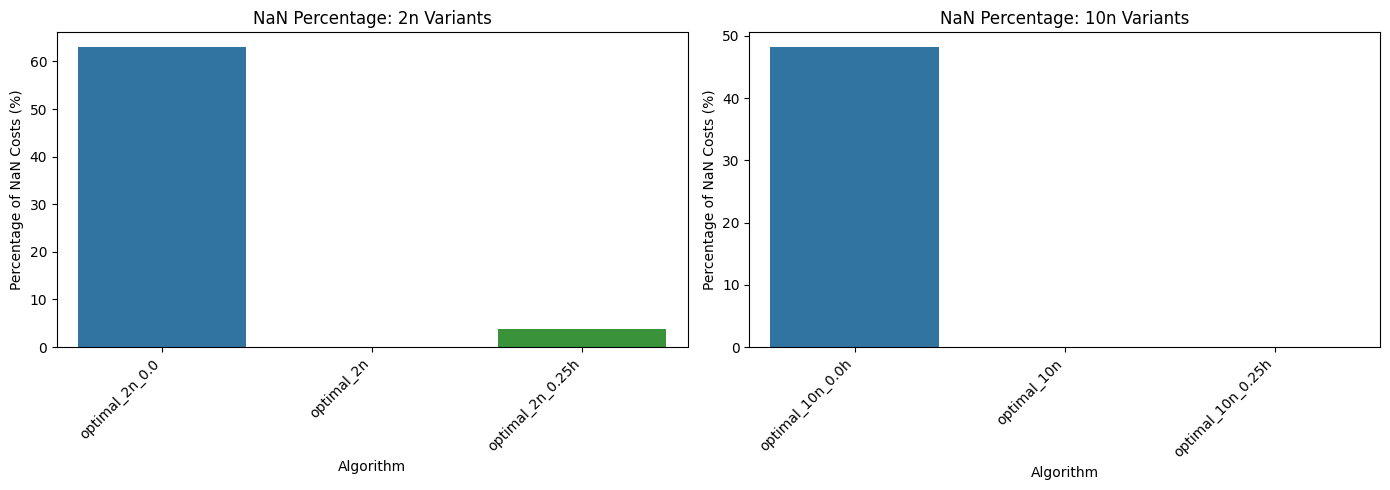

In [7]:
#plot the percentage of na per algo in cvrp_optimal_results_with_na
na_summary = (
    cvrp_optimal_results_with_na
    .groupby('algo')['cost']
    .apply(lambda x: x.isna().mean() * 100)
    .reset_index()
)
na_summary.columns = ['algo', 'na_percentage']

# Define orders for 2n and 10n variants
order_2n = ["optimal_2n_0.0", "optimal_2n", "optimal_2n_0.25h"]
order_10n = ["optimal_10n_0.0h", "optimal_10n", "optimal_10n_0.25h"]

# Filter data for 2n and 10n
na_summary_2n = na_summary[na_summary['algo'].isin(order_2n)]
na_summary_10n = na_summary[na_summary['algo'].isin(order_10n)]

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for 2n variants
sns.barplot(data=na_summary_2n, x='algo', y='na_percentage', order=order_2n, ax=ax1)
ax1.set_ylabel('Percentage of NaN Costs (%)')
ax1.set_xlabel('Algorithm')
ax1.set_title('NaN Percentage: 2n Variants')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot for 10n variants
sns.barplot(data=na_summary_10n, x='algo', y='na_percentage', order=order_10n, ax=ax2)
ax2.set_ylabel('Percentage of NaN Costs (%)')
ax2.set_xlabel('Algorithm')
ax2.set_title('NaN Percentage: 10n Variants')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [8]:
#remove the optimal_10n_0.25h
cvrp_optimal_results = cvrp_optimal_results[cvrp_optimal_results['algo'] != 'optimal_10n_0.25h']

In [9]:
#add to combined_df the cvrp_optimal_results
combined_df = pd.concat([combined_df, cvrp_optimal_results], ignore_index=True)

In [10]:
#create a list of dfs, one per instance_name
instance_dfs = {instance: combined_df[combined_df['instance_name'] == instance] for instance in combined_df['instance_name'].unique()}
#now for each one create a column named "gap_to_optimal" which is the percentage gap to optimal
for instance, df in instance_dfs.items():
    optimal_value = df[df['algo'] == 'optimal']['cost'].values[0]
    df['gap_to_optimal'] = (df['cost'] - optimal_value) / optimal_value * 100
    instance_dfs[instance] = df

#show one dataframe as example
instance_dfs[list(instance_dfs.keys())[0]]

C:\Users\hmdis\AppData\Local\Temp\ipykernel_29456\2685031834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gap_to_optimal'] = (df['cost'] - optimal_value) / optimal_value * 100
C:\Users\hmdis\AppData\Local\Temp\ipykernel_29456\2685031834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gap_to_optimal'] = (df['cost'] - optimal_value) / optimal_value * 100
C:\Users\hmdis\AppData\Local\Temp\ipykernel_29456\2685031834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,algo,cost,time_to_best,instance_name,gap_to_optimal
0,optimal,784.000000,NaN,A-n32-k5,0.000000
39,cw,843.688169,0.000434,A-n32-k5,7.613287
40,ls,828.700148,0.004861,A-n32-k5,5.701549
41,tabu,828.700148,0.006227,A-n32-k5,5.701549
42,alns,787.081889,0.159971,A-n32-k5,0.393098
43,lns,787.081889,4.862765,A-n32-k5,0.393098
44,best,787.081889,4.862765,A-n32-k5,0.393098
209,pyvrp,784.000000,90.003000,A-n32-k5,0.000000
216,optimal_10n,784.000000,71.425414,A-n32-k5,0.000000
243,optimal_2n,784.000000,64.012338,A-n32-k5,0.000000


In [11]:
#merge all the dataframes back into one
final_df = pd.concat(instance_dfs.values(), ignore_index=True)
final_df.head(10)

,algo,cost,time_to_best,instance_name,gap_to_optimal
0,optimal,784.000000,NaN,A-n32-k5,0.000000
1,cw,843.688169,0.000434,A-n32-k5,7.613287
2,ls,828.700148,0.004861,A-n32-k5,5.701549
3,tabu,828.700148,0.006227,A-n32-k5,5.701549
4,alns,787.081889,0.159971,A-n32-k5,0.393098
5,lns,787.081889,4.862765,A-n32-k5,0.393098
6,best,787.081889,4.862765,A-n32-k5,0.393098
7,pyvrp,784.000000,90.003000,A-n32-k5,0.000000
8,optimal_10n,784.000000,71.425414,A-n32-k5,0.000000
9,optimal_2n,784.000000,64.012338,A-n32-k5,0.000000


In [12]:
#for every algo calculate the average gap to optimal across all instances, and the std
summary_df = final_df.groupby('algo')['gap_to_optimal'].agg(['mean', 'std']).reset_index()
#remove optimal from the summary_df
summary_df = summary_df[summary_df['algo'] != 'optimal']
summary_df.head(10)

,algo,mean,std
0,alns,0.571001,0.459556
1,best,0.526870,0.437211
2,cw,5.088691,1.859545
3,lns,0.699361,0.548982
4,ls,3.603687,1.671574
6,optimal_10n,0.618754,0.812313
7,optimal_2n,1.941917,2.567037
8,pyvrp,0.000000,0.000000
9,tabu,4.000276,1.629455


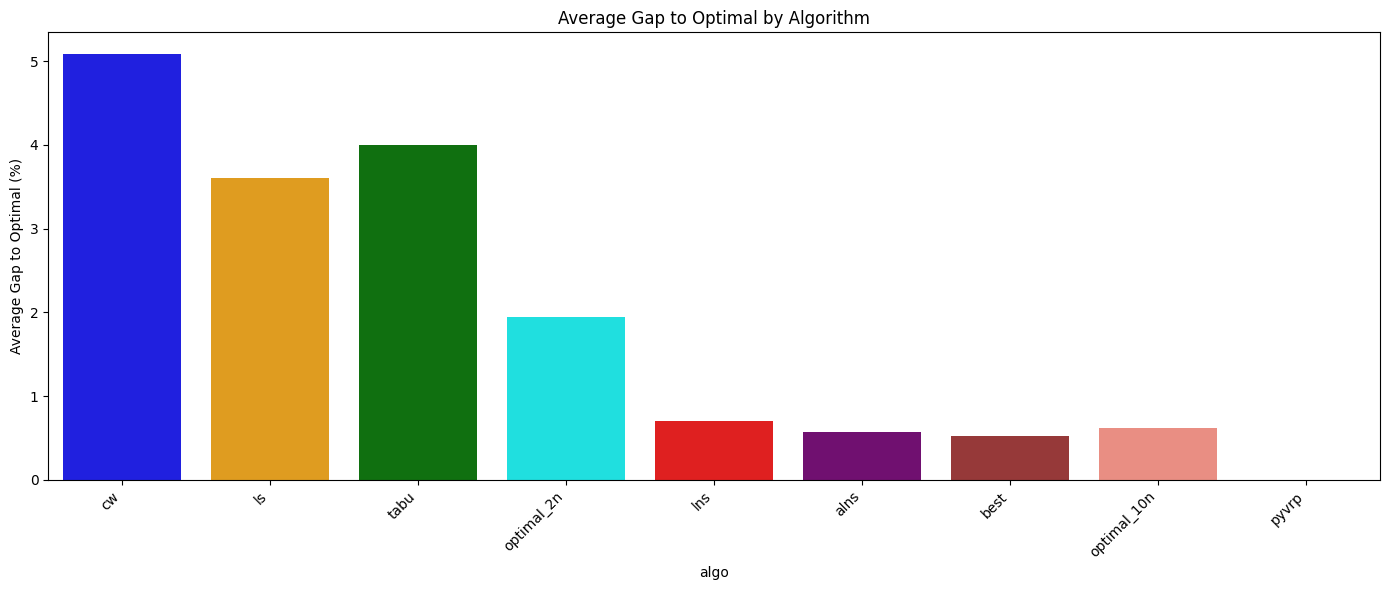

In [13]:
#do the same but i want to rearrange the order of the algorithms in the final_df and summary_df dataframes
algo_order = ["cw", "ls", "tabu", "optimal_2n", "lns", "alns", "best", "optimal_10n", "pyvrp"]
#assign colours to each algorithm for plotting purposes
color_map = {
    "cw": "blue",
    "ls": "orange",
    "tabu": "green",
    "lns": "red",
    "alns": "purple",
    "best": "brown",
    "pyvrp": "black",
    "optimal_2n": "cyan",
    "optimal_10n": "salmon",
}
#plot
order_map = {algo: i for i, algo in enumerate(algo_order)}
final_df = final_df.sort_values(
    by=['instance_name', 'algo'],
    key=lambda x: x.map(order_map)
)
#remove optimal from the summary_df
summary_df = summary_df[summary_df['algo'] != 'optimal']
summary_df = summary_df.sort_values(
    by='algo',
    key=lambda x: x.map(order_map)
)
summary_df.head()
plt.figure(figsize=(14, 6))
sns.barplot(data=summary_df, x='algo', y='mean', palette=[color_map[algo] for algo in summary_df['algo']])
plt.ylabel('Average Gap to Optimal (%)')
plt.title('Average Gap to Optimal by Algorithm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
#calculate the mean and std time_to_best for each algorithm
time_summary_df = final_df.groupby('algo')['time_to_best'].agg(['mean', 'std']).reset_index()
time_summary_df = time_summary_df[time_summary_df['algo'] != 'optimal']
time_summary_df = time_summary_df.sort_values(
    by='algo',
    key=lambda x: x.map(order_map)
)
time_summary_df.head()

,algo,mean,std
2,cw,0.000918,0.000469
4,ls,0.009431,0.013028
9,tabu,0.012376,0.009400
7,optimal_2n,96.716355,30.102215
3,lns,22.258547,34.649420


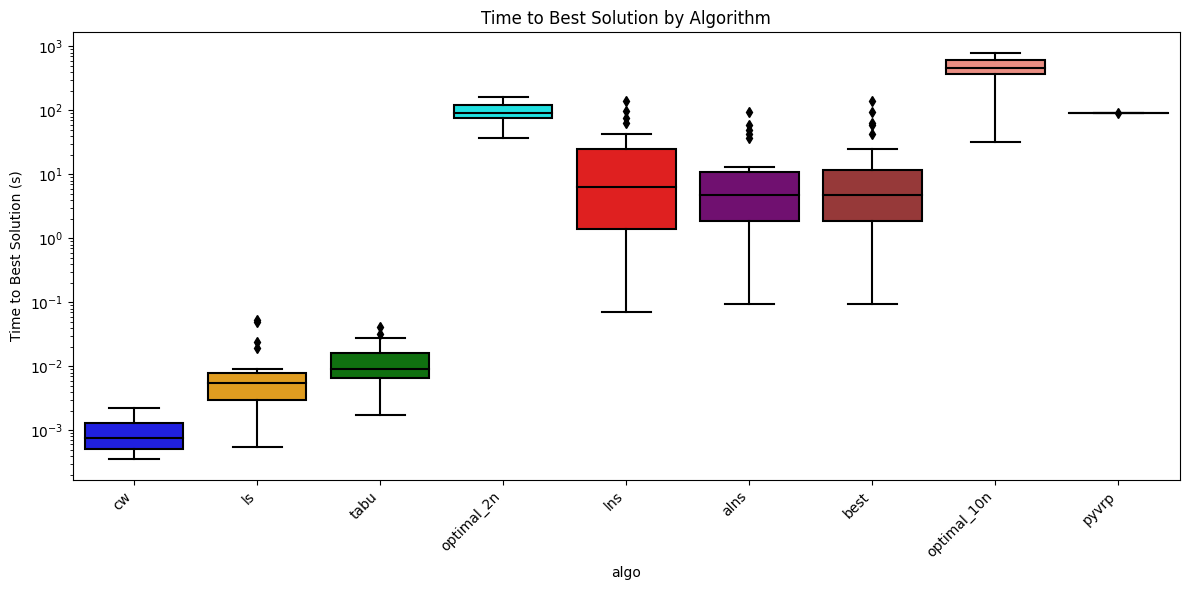

In [15]:
#plot a box plot, with the correct order and colors, for time_to_best for each algorithm
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df[final_df['algo'] != 'optimal'], x='algo', y='time_to_best', order=algo_order, palette=[color_map[algo] for algo in algo_order])
plt.ylabel('Time to Best Solution (s)')
plt.title('Time to Best Solution by Algorithm')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Use log scale due to wide range of values
plt.tight_layout()
plt.show()

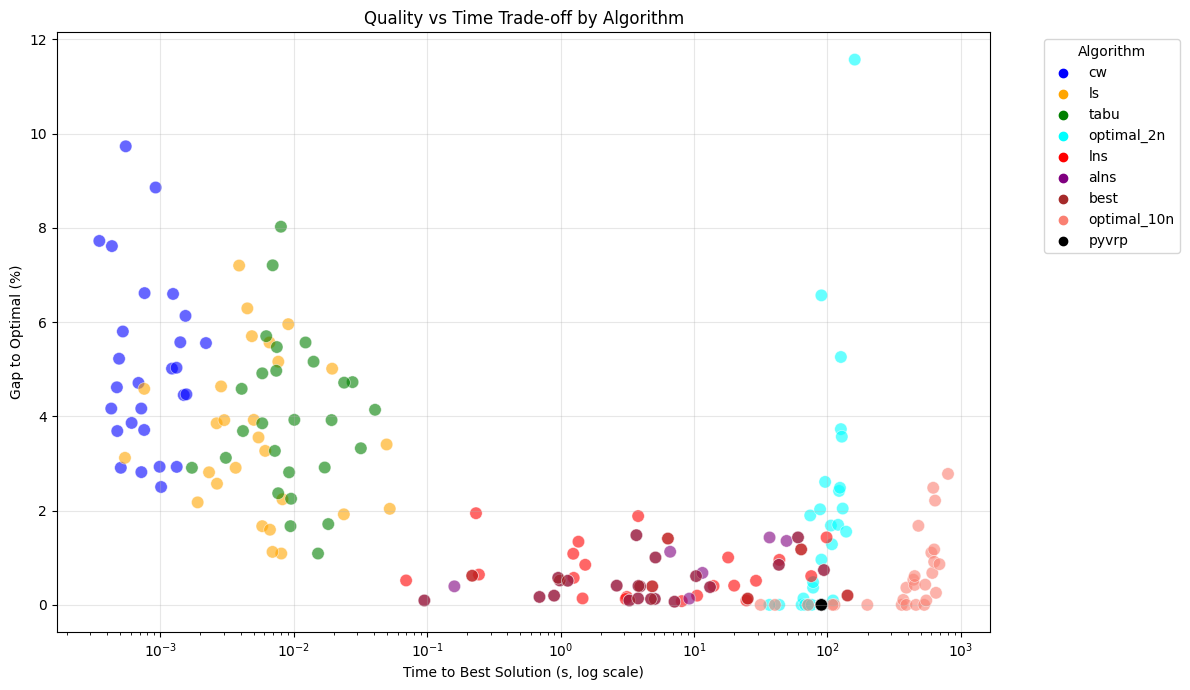

In [16]:

plt.figure(figsize=(12, 7))
sns.scatterplot(data=final_df[final_df['algo'] != 'optimal'], x='time_to_best', y='gap_to_optimal', 
                hue='algo', palette=color_map, s=80, alpha=0.6, edgecolor='white', linewidth=0.5)
plt.xscale('log')
plt.xlabel('Time to Best Solution (s, log scale)')
plt.ylabel('Gap to Optimal (%)')
plt.title('Quality vs Time Trade-off by Algorithm')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

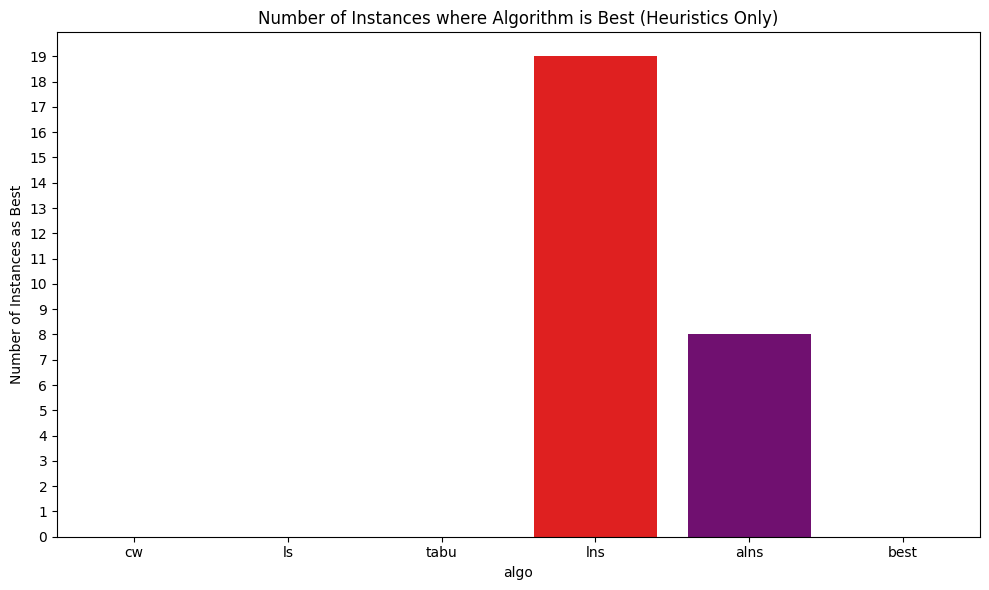

In [17]:
best_df = final_df[final_df['algo'] != 'optimal'].copy()
# Remove pyvrp, optimal_2n, and optimal_10n
best_df = best_df[~best_df['algo'].isin(['pyvrp', 'optimal_2n', 'optimal_10n'])]
best_df = best_df.loc[best_df.groupby('instance_name')['gap_to_optimal'].idxmin()]
best_counts = best_df['algo'].value_counts().reset_index()
best_counts.columns = ['algo', 'best_count']

# Create filtered order list (only heuristics, no pyvrp, no optimal variants)
filtered_order = ["cw", "ls", "tabu", "lns", "alns", "best"]
filtered_palette = [color_map[algo] for algo in filtered_order]

plt.figure(figsize=(10, 6))
sns.barplot(data=best_counts, x='algo', y='best_count', order=filtered_order, palette=filtered_palette)
plt.ylabel('Number of Instances as Best')
plt.title('Number of Instances where Algorithm is Best (Heuristics Only)')
#integer y axis
plt.yticks(range(0, best_counts['best_count'].max() + 1))
plt.tight_layout()
plt.show()